In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [43]:
data=pd.read_csv("Titanic Preproc.csv")

In [44]:
data["Survived"]=data["Survived"].map({"Yes":1,"No":0})
data.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [46]:
data["Sex"]=data["Sex"].map({"male":1,"female":0})

In [48]:
data.head()
data.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [70]:
x=data[[ "Pclass", "Sex"]]
y=data["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


In [61]:
confusion_matrix = pd.crosstab (y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          85  23
1          25  46


# For classifications setting the thresholde is the most important parametre to classify either class a or class b in various domaines it differs for example getting negatif possitifs in a pandamic is better than getting more negatifs negatifs 

# The threshold goes from 0 to 1 for us to determine the best threshold without visualizing all the confusion matrixs we use ROC to draw a courbe of the relations between False Positive and True Positive for evry possible threshhold
# the further one from the line where x=y is the best threshold and the AUC is the surface between the courbe and the line (x=y) the bigger that surface is the better


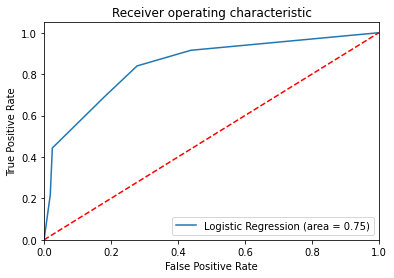

In [74]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
